# KMeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

读取文件

In [2]:
dataset = np.loadtxt("data.txt",delimiter=' ')
c1 = np.loadtxt("c1.txt",delimiter=' ')
c2 = np.loadtxt("c2.txt",delimiter=' ')

聚类函数

In [3]:
# 参数列表：待聚类数据，初始中心点，迭代次数，距离计算方式
def Kmeans(data,centroids,iterations,distance_way): 
    dataset = data
    cent = centroids
    # 初始化cost列表
    cost = []
    for i in range(iterations):
        # 计算data各点到各个中心的距离
        distance = list(map(lambda x:np.array([np.sqrt(np.sum((x-y)**2)) for y in cent] if (distance_way == 'Euclidean') else [np.sum(abs(x-y)) for y in cent] ),dataset))
        # 计算cost并找出各点的最小cost值
        min_distance_list=list(map(lambda x: (np.amin(x))**2 if (distance_way == 'Euclidean') else (np.amin(x)),distance))
        # 匹配各点距离最近的中心
        min_distance_index=list(map(lambda x: np.argmin(x),distance))
        # 打印每次迭代后的cost
        print('iteration', i+1,':',np.sum(min_distance_list))
        # 存储每次迭代后的cost
        cost.append(np.sum(min_distance_list))
        # 链接各点数据和所属类别
        group_temp=list(zip(min_distance_index,dataset))
        # 计算每类的各个维度的均值，更新中心点
        data = pd.DataFrame(group_temp)
        cent=np.array(list(map(lambda x: np.average(x[1],axis=0)[1],data.groupby(0))))
    return cost

欧氏距离，c1为初始中心

In [4]:
cost_Euclidean_c1=Kmeans(dataset,c1,20,'Euclidean')

iteration 1 : 623660345.306411
iteration 2 : 509862908.2975452
iteration 3 : 485480681.8720081
iteration 4 : 463997011.68501264
iteration 5 : 460969266.57299656
iteration 6 : 460537847.98276794
iteration 7 : 460313099.65354526
iteration 8 : 460003523.88940734
iteration 9 : 459570539.3177351
iteration 10 : 459021103.342291
iteration 11 : 458490656.19198096
iteration 12 : 457944232.58797425
iteration 13 : 457558005.1986768
iteration 14 : 457290136.35230196
iteration 15 : 457050555.0595628
iteration 16 : 456892235.61535484
iteration 17 : 456703630.7370337
iteration 18 : 456404203.0189748
iteration 19 : 456177800.54199314
iteration 20 : 455986871.02734584


欧氏距离，c2为初始中心

In [5]:
cost_Euclidean_c2=Kmeans(dataset,c2,20,'Euclidean')

iteration 1 : 438747790.02791697
iteration 2 : 249803933.62600315
iteration 3 : 194494814.40631247
iteration 4 : 169804841.451543
iteration 5 : 156295748.80627602
iteration 6 : 149094208.1089661
iteration 7 : 142508531.61961526
iteration 8 : 132303869.40652972
iteration 9 : 117170969.83719075
iteration 10 : 108547377.17857005
iteration 11 : 102237203.317996
iteration 12 : 98278015.74975672
iteration 13 : 95630226.12177396
iteration 14 : 93793314.05119297
iteration 15 : 92377131.96821073
iteration 16 : 91541606.25423887
iteration 17 : 91045573.83042458
iteration 18 : 90752240.101408
iteration 19 : 90470170.18122733
iteration 20 : 90216416.17563124


曼哈顿距离，c1为初始中心

In [6]:
cost_Manhattan_c1=Kmeans(dataset,c1,20,'Manhattan')

iteration 1 : 550117.142
iteration 2 : 464829.26840394514
iteration 3 : 470934.15384668077
iteration 4 : 483874.8162850933
iteration 5 : 489234.2347883458
iteration 6 : 487664.69262679014
iteration 7 : 483718.6659285138
iteration 8 : 475337.9476330569
iteration 9 : 474871.96654965583
iteration 10 : 457244.7897417529
iteration 11 : 447493.1956040524
iteration 12 : 450891.83580477023
iteration 13 : 451232.57747569564
iteration 14 : 451860.12588546483
iteration 15 : 451567.22358914884
iteration 16 : 452710.052099943
iteration 17 : 453078.2269618495
iteration 18 : 450646.1355620944
iteration 19 : 450419.9701134354
iteration 20 : 449009.59037188475


曼哈顿距离，c2为初始中心

In [7]:
cost_Manhattan_c2=Kmeans(dataset,c2,20,'Manhattan')

iteration 1 : 1433739.31
iteration 2 : 1084488.7769648787
iteration 3 : 973431.714662042
iteration 4 : 895934.592563071
iteration 5 : 865128.3352940822
iteration 6 : 845846.6470313489
iteration 7 : 827219.5827561263
iteration 8 : 803590.3456011105
iteration 9 : 756039.5172761206
iteration 10 : 717332.9025432304
iteration 11 : 694587.9252526884
iteration 12 : 684444.5019967912
iteration 13 : 674574.7475478558
iteration 14 : 667409.4699160268
iteration 15 : 663556.6278215034
iteration 16 : 660162.7772287573
iteration 17 : 656041.3222947125
iteration 18 : 653036.7540731605
iteration 19 : 651112.426252273
iteration 20 : 649689.0131843532


## (a) 1. 作图

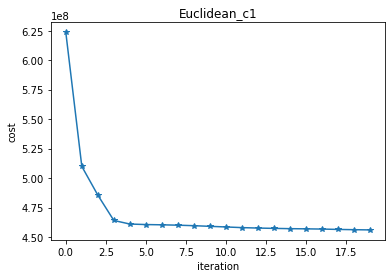

In [8]:
plt.plot(cost_Euclidean_c1,marker='*')
plt.title("Euclidean_c1")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

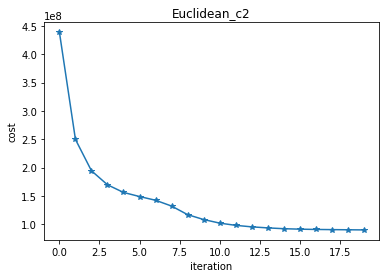

In [9]:
plt.plot(cost_Euclidean_c2,marker='*')
plt.title("Euclidean_c2")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

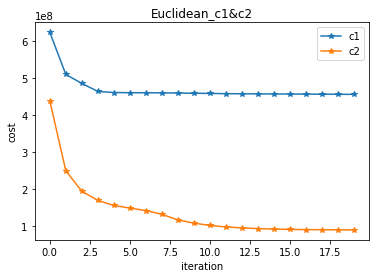

In [10]:
plt.plot(cost_Euclidean_c1, label="c1",marker='*')
plt.plot(cost_Euclidean_c2, label = "c2",marker='*')
plt.legend(loc='upper right')
plt.title("Euclidean_c1&c2")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

## (a) 2. 分析

In [11]:
print('c1在十次迭代后cost相比最初，降低了{:.2%}'.format((cost_Euclidean_c1[0]-cost_Euclidean_c1[10])/cost_Euclidean_c1[0]))
print('c2在十次迭代后cost相比最初，降低了{:.2%}'.format((cost_Euclidean_c2[0]-cost_Euclidean_c2[10])/cost_Euclidean_c2[0]))

c1在十次迭代后cost相比最初，降低了26.48%
c2在十次迭代后cost相比最初，降低了76.70%


    c1在十次迭代后cost相比最初，降低了26.48%
    c2在十次迭代后cost相比最初，降低了76.70%
    就cost而言，c2表现比c1好，即初始选择距离较远的点作为聚类中心相较于随机选取效果理想
    推测原因：随机选取可能选到过于靠近的点，导致迭代过程中掉入局部最优而非全局最优。

## (b) 1. 作图

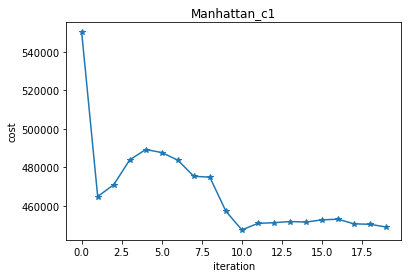

In [12]:
plt.plot(cost_Manhattan_c1,marker='*')
plt.title("Manhattan_c1")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

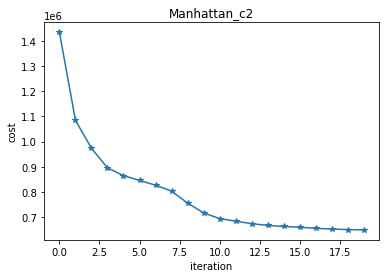

In [13]:
plt.plot(cost_Manhattan_c2,marker='*')
plt.title("Manhattan_c2")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

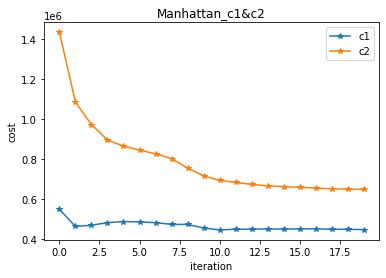

In [14]:
plt.plot(cost_Manhattan_c1, label="c1",marker='*')
plt.plot(cost_Manhattan_c2, label = "c2",marker='*')
plt.legend(loc='upper right')
plt.title("Manhattan_c1&c2")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

## (b) 2. 分析

In [15]:
print('c1在十次迭代后cost相比最初，降低了{:.2%}'.format((cost_Manhattan_c1[0]-cost_Manhattan_c1[10])/cost_Manhattan_c1[0]))
print('c2在十次迭代后cost相比最初，降低了{:.2%}'.format((cost_Manhattan_c2[0]-cost_Manhattan_c2[10])/cost_Manhattan_c2[0]))

c1在十次迭代后cost相比最初，降低了18.65%
c2在十次迭代后cost相比最初，降低了51.55%


    c1在十次迭代后cost相比最初，降低了18.65%
    c2在十次迭代后cost相比最初，降低了51.55%
    就cost而言，c2表现比c1好，即初始选择距离较远的点作为聚类中心相较于随机选取效果理想
    推测原因：随机选取可能选到过于靠近的点，导致迭代过程中掉入局部最优而非全局最优。